In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

main_path = 'C:\\Users\\Kunde\\learnpy\\datasets\\med_mnist\\'

In [36]:
X_train = tf.keras.preprocessing.image_dataset_from_directory(
    main_path, 
    labels = 'inferred',
    label_mode = 'int',
    validation_split=0.2,
    subset = 'training',
    seed = 666,
    image_size=(64,64)
) 


X_val = tf.keras.preprocessing.image_dataset_from_directory(
    main_path, 
    labels = 'inferred',
    label_mode = 'int',
    validation_split=0.2,
    subset = 'validation',
    seed = 666,
    image_size=(64,64)
)

Found 58954 files belonging to 6 classes.
Using 47164 files for training.
Found 58954 files belonging to 6 classes.
Using 11790 files for validation.


In [37]:
class_names = X_train.class_names
print(class_names)

['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


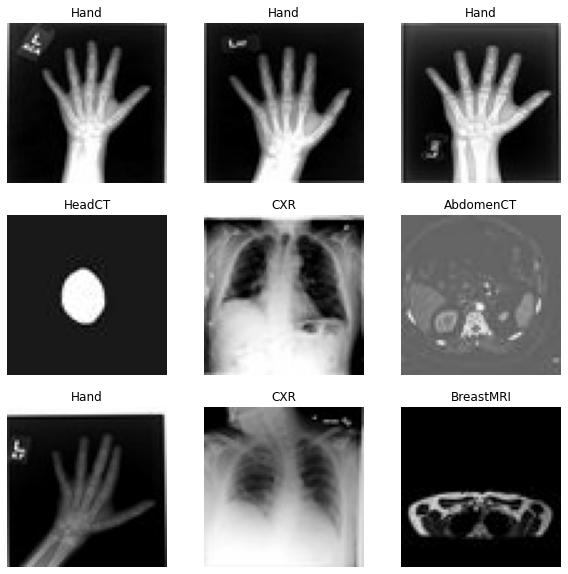

In [38]:
plt.figure(figsize=(10, 10))
for images, labels in X_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(X_train.class_names[labels[i]])
    plt.axis("off")

In [45]:
input_shape =(64, 64, 3)

model = keras.models.Sequential([
  keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(64, 64, 3)),
  keras.layers.Conv2D(50, (5, 5), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(3, 3)),
  keras.layers.Conv2D(30, (4, 4), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(6, activation='softmax'),
])

model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_9 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 60, 60, 50)        3800      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 20, 20, 50)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 17, 17, 30)        24030     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 30)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1920)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 6)               

In [43]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics = ['accuracy'])

In [44]:
history = model.fit(X_train, 
                    validation_data = X_val, 
                    epochs=10)

Epoch 1/10
1474/1474 [==============================] - 122s 83ms/step - loss: 0.4885 - accuracy: 0.8371 - val_loss: 0.0753 - val_accuracy: 0.9848
Epoch 2/10
1474/1474 [==============================] - 121s 82ms/step - loss: 0.0537 - accuracy: 0.9895 - val_loss: 0.0394 - val_accuracy: 0.9959
Epoch 3/10
1474/1474 [==============================] - 121s 82ms/step - loss: 0.0309 - accuracy: 0.9940 - val_loss: 0.0296 - val_accuracy: 0.9966
Epoch 4/10
1474/1474 [==============================] - 121s 82ms/step - loss: 0.0197 - accuracy: 0.9957 - val_loss: 0.0322 - val_accuracy: 0.9945
Epoch 5/10
1474/1474 [==============================] - 123s 83ms/step - loss: 0.0159 - accuracy: 0.9967 - val_loss: 0.0187 - val_accuracy: 0.9977
Epoch 6/10
1474/1474 [==============================] - 119s 81ms/step - loss: 0.0120 - accuracy: 0.9974 - val_loss: 0.0165 - val_accuracy: 0.9978
Epoch 7/10
1474/1474 [==============================] - 119s 81ms/step - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0